In [1]:
import pandas as pd


column_names = ['user_id', 'item_id', 'category_id', 'behavior_type', 'timestamp']

taobao_df = pd.read_csv(
    r"C:\Users\user\Desktop\JDE9\Taobao User Behavior Data Analysis\UserBehavior.csv",
    header=None,
    names=column_names
)


print(taobao_df.head(5))

   user_id  item_id  category_id behavior_type   timestamp
0        1  2268318      2520377            pv  1511544070
1        1  2333346      2520771            pv  1511561733
2        1  2576651       149192            pv  1511572885
3        1  3830808      4181361            pv  1511593493
4        1  4365585      2520377            pv  1511596146


In [2]:
print("check_taobao_df how may row",taobao_df.shape)
taobao_df.drop_duplicates()
print("drop_duplicates to taobao_df",taobao_df.shape)

check_taobao_df how may row (100150807, 5)
drop_duplicates to taobao_df (100150807, 5)


In [7]:
taobao_df.isnull().sum()

user_id          0
item_id          0
category_id      0
behavior_type    0
timestamp        0
date             0
time             0
week             0
hour             0
dtype: int64

In [7]:
taobao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100150807 entries, 0 to 100150806
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   category_id    int64 
 3   behavior_type  object
 4   timestamp      int64 
dtypes: int64(4), object(1)
memory usage: 3.7+ GB


In [2]:
taobao_df['timestamp'] = pd.to_datetime(taobao_df['timestamp'], unit='s', utc=True)
taobao_df['timestamp'] = taobao_df['timestamp'].dt.tz_convert('Asia/Shanghai')
print(taobao_df.head(5))

   user_id  item_id  category_id behavior_type                 timestamp
0        1  2268318      2520377            pv 2017-11-25 01:21:10+08:00
1        1  2333346      2520771            pv 2017-11-25 06:15:33+08:00
2        1  2576651       149192            pv 2017-11-25 09:21:25+08:00
3        1  3830808      4181361            pv 2017-11-25 15:04:53+08:00
4        1  4365585      2520377            pv 2017-11-25 15:49:06+08:00


In [3]:
taobao_df['timestamp'] = taobao_df['timestamp'].dt.tz_localize(None)
print(taobao_df.head(5))


   user_id  item_id  category_id behavior_type           timestamp
0        1  2268318      2520377            pv 2017-11-25 01:21:10
1        1  2333346      2520771            pv 2017-11-25 06:15:33
2        1  2576651       149192            pv 2017-11-25 09:21:25
3        1  3830808      4181361            pv 2017-11-25 15:04:53
4        1  4365585      2520377            pv 2017-11-25 15:49:06


In [4]:
def to_date(dt):
    return dt.date()

def to_time(dt):
    return dt.time()

def getWeek(dt):
    return weekDict[dt.weekday()]


weekDict = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}


taobao_df['date'] = taobao_df['timestamp'].apply(to_date)
taobao_df['time'] = taobao_df['timestamp'].apply(to_time)
taobao_df['week'] = taobao_df['timestamp'].apply(getWeek)

print(taobao_df.head(5))

   user_id  item_id  category_id behavior_type           timestamp  \
0        1  2268318      2520377            pv 2017-11-25 01:21:10   
1        1  2333346      2520771            pv 2017-11-25 06:15:33   
2        1  2576651       149192            pv 2017-11-25 09:21:25   
3        1  3830808      4181361            pv 2017-11-25 15:04:53   
4        1  4365585      2520377            pv 2017-11-25 15:49:06   

         date      time week  
0  2017-11-25  01:21:10  Sat  
1  2017-11-25  06:15:33  Sat  
2  2017-11-25  09:21:25  Sat  
3  2017-11-25  15:04:53  Sat  
4  2017-11-25  15:49:06  Sat  


In [5]:
taobao_df['hour'] = taobao_df['time'].astype(str).str.split(':').str[0]

In [7]:
taobao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100150807 entries, 0 to 100150806
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   item_id        int64         
 2   category_id    int64         
 3   behavior_type  object        
 4   timestamp      datetime64[ns]
 5   date           object        
 6   time           object        
 7   week           object        
 8   hour           object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 6.7+ GB


In [6]:
taobao_df['date'] = pd.to_datetime(taobao_df['date'])

start_date = pd.to_datetime('2017-11-25')
end_date = pd.to_datetime('2017-12-03')


filtered_taobao_df = taobao_df[(taobao_df['date'] >= start_date) & (taobao_df['date'] <= end_date)]


In [9]:
filtered_taobao_df.shape

(100095231, 9)

In [12]:
pv_data = filtered_taobao_df[filtered_taobao_df['behavior_type'] == 'pv']

pv_uv_puv = pv_data.groupby('date').agg(
    pv=('user_id', 'count'),  
    uv=('user_id', pd.Series.nunique), 
).reset_index()

pv_uv_puv['puv'] = round(pv_uv_puv['pv'] / pv_uv_puv['uv'], 1)

print(pv_uv_puv.head(10))

         date        pv      uv   puv
0  2017-11-25   9353423  686953  13.6
1  2017-11-26   9567423  695869  13.7
2  2017-11-27   9041187  689260  13.1
3  2017-11-28   8842933  688042  12.9
4  2017-11-29   9210821  697542  13.2
5  2017-11-30   9358998  709586  13.2
6  2017-12-01   9718959  718184  13.5
7  2017-12-02  12329644  939383  13.1
8  2017-12-03  12237300  936431  13.1


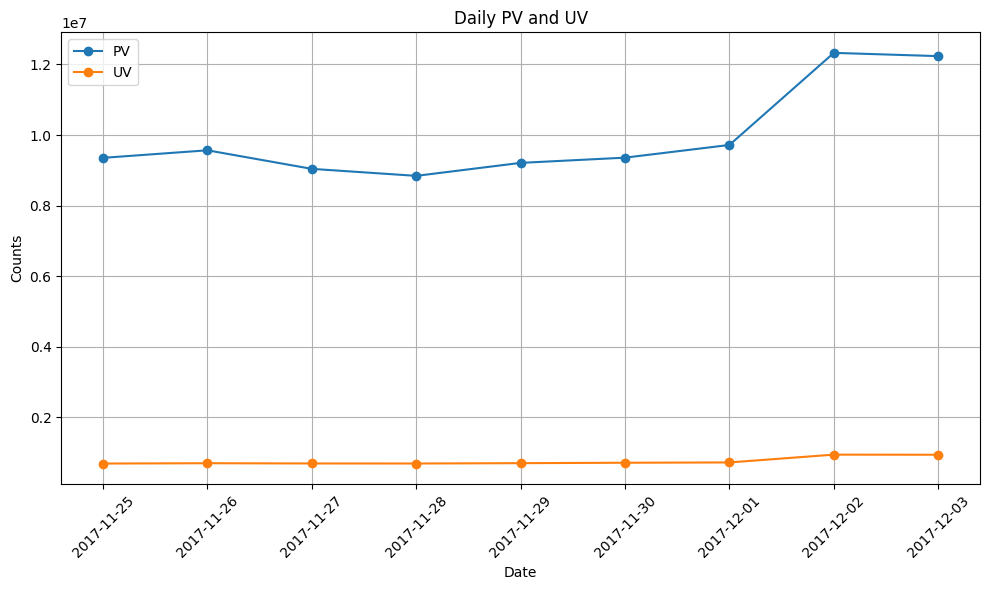

In [13]:
import matplotlib.pyplot as plt

pv_uv_puv['date'] = pd.to_datetime(pv_uv_puv['date'])

plt.figure(figsize=(10, 6))

plt.plot(pv_uv_puv['date'], pv_uv_puv['pv'], label='PV', marker='o')

plt.plot(pv_uv_puv['date'], pv_uv_puv['uv'], label='UV', marker='o')

plt.title('Daily PV and UV')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [15]:
filtered_taobao_df['dates'] = pd.to_datetime(filtered_taobao_df['date'])

user_dates = filtered_taobao_df.groupby(['user_id', 'dates']).size().reset_index(name='counts')

user_dates = user_dates.merge(user_dates, on='user_id', suffixes=('_a', '_b'))

user_dates['date_diff'] = (user_dates['dates_b'] - user_dates['dates_a']).dt.days

next_day = user_dates[user_dates['date_diff'] == 1].groupby('dates_a').size()
same_day = user_dates[user_dates['date_diff'] == 0].groupby('dates_a').size()

retention_rate = (next_day / same_day).reset_index()
retention_rate.columns = ['dates', 'retention_1']

retention_rate['dates'] = retention_rate['dates'].dt.strftime('%Y-%m-%d')

print(retention_rate)

C:\Users\user\AppData\Local\Temp\ipykernel_24376\3583973492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_taobao_df['dates'] = pd.to_datetime(filtered_taobao_df['date'])


        dates  retention_1
0  2017-11-25     0.788700
1  2017-11-26     0.777312
2  2017-11-27     0.784840
3  2017-11-28     0.791348
4  2017-11-29     0.795558
5  2017-11-30     0.796272
6  2017-12-01     0.982475
7  2017-12-02     0.979785
8  2017-12-03          NaN


In [16]:
user_behavior_count = filtered_taobao_df.groupby('user_id').size()

# find one time users
bounce_users = user_behavior_count[user_behavior_count == 1].count()

# check the total_pv
total_pv = pv_uv_puv['pv'].sum()

# check the % of  bounce users
bounce_rate = bounce_users / total_pv

# 输出结果
print("流失用户:", bounce_users)
print("Total_pv:", total_pv)
print("流失率:", bounce_rate)

流失用户: 88
Total_pv: 89660688
流失率: 9.81478081006918e-07


In [ ]:
filtered_taobao_df.to_csv(r"C:\Users\user\Desktop\JDE9\Taobao User Behavior Data Analysis\claen_taobao_df.csv", index=False)